In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
pickups = np.random.randint(0,1000 , size=2000)
pickups

array([102, 435, 860, ..., 476, 593, 222])

media 498.9185
desvio padrao 294.2275511534397
media amostral 428.4
desvio amostral 257.0242977914197
393.5325 605.0674999999998


(53.71835560208136, 53.92083409912643)

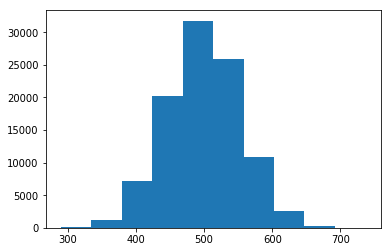

In [7]:
# population mean
print('media',pickups.mean())

# population standard deviation
print('desvio padrao',pickups.std())

# draw a sample from population
sample = np.random.choice(pickups, size=30)
sample

#first sample mean
sample_mean = sample.mean()
print('media amostral', sample_mean)

sample_std = np.std(sample, ddof=1)
print('desvio amostral',sample_std)

# estimated standard error for sapmle mann
sample_std/(30 ** 0.5)

# theorical standard error for sapmle mann
pickups.std()/(30 ** 0.5)

# construct the simulated sampling distribution
sample_props = []
for _ in range(100000):
    sample = np.random.choice(pickups, size=30, replace = True)
    sample_props.append(sample.mean())

# the simulated mean of the sampling distribution
simulated_mean = np.mean(sample_props)

# the simulated standard deviation of the sampling distribution
simulated_std = np.std(sample_props)
liminf = np.percentile(sample_props,2.5)
limsup = np.percentile(sample_props,97.5)
print(liminf,limsup)
# plot the simulated sampling distribution,
# under the Central Limit Theorem,
# it is expected normal
plt.hist(sample_props)

# the theorical mean and simulated mean
(pickups.mean(), simulated_mean)


# the theorical standard error and simulated standard error
(pickups.std()/(30 ** 0.5), simulated_std)


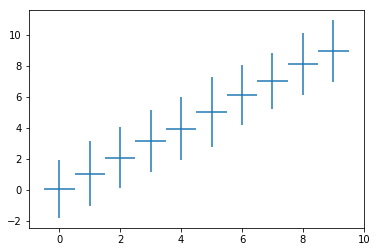

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['category'] = np.random.choice(np.arange(10), 1000, replace=True)
df['number'] = np.random.normal(df['category'], 1)

mean = df.groupby('category')['number'].mean()
std = df.groupby('category')['number'].std()

plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='')
plt.show()